In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from scipy.stats import gaussian_kde

In [51]:
def add_counts_to_heatmap(ax, xedges, yedges, hist):
    # 각 셀에 빈도수 표시
    for i in range(len(xedges) - 1):
        for j in range(len(yedges) - 1):
            count = int(hist[i, j])
            if count > 0:
                ax.text(xedges[i] + 0.5 * (xedges[i+1] - xedges[i]), 
                        yedges[j] + 0.5 * (yedges[j+1] - yedges[j]), 
                        str(int(hist[i, j])), 
                        ha='center', va='center', color='black')

In [ ]:
def draw_head(num_samples, save_name, range_min=-45, range_max=45):
    num_samples_range1 = int(num_samples * 0.15)
    range1_roll_pitch_yaw = np.column_stack([
        np.random.uniform(-45, 45, (num_samples_range1,)),
        np.random.uniform(-30, 30, (num_samples_range1,)),
        np.random.uniform(-30, 30, (num_samples_range1,))
    ])

    
    num_samples_range2 = int(num_samples * 0.15)
    range2_roll_pitch_yaw = np.column_stack([
        np.random.uniform(-30, 30, (num_samples_range2,)),
        np.random.uniform(-45, 45, (num_samples_range2,)),
        np.random.uniform(-30, 30, (num_samples_range2,))
    ])
    
    num_samples_range3 = int(num_samples * 0.15)
    range3_roll_pitch_yaw = np.column_stack([
        np.random.uniform(-30, 30, (num_samples_range3,)),
        np.random.uniform(-30, 30, (num_samples_range3,)),
        np.random.uniform(-45, 45, (num_samples_range3,))
    ])
    
    num_samples_range4 = int(num_samples * 0.4)
    range4_roll_pitch_yaw = np.column_stack([
        np.random.uniform(-30, 30, (num_samples_range4,)),
        np.random.uniform(-30, 30, (num_samples_range4,)),
        np.random.uniform(-30, 30, (num_samples_range4,))
    ])
    
    num_samples_range5 = int(num_samples * 0.15)
    range5_roll_pitch_yaw = np.column_stack([
        np.random.uniform(-37.5, 37.5, (num_samples_range5,)),
        np.random.uniform(-37.5, 37.5, (num_samples_range5,)),
        np.random.uniform(-37.5, 37.5, (num_samples_range5,))
    ])

    # 각 범위의 데이터를 합침
    roll_pitch_yaw_data = np.vstack([range1_roll_pitch_yaw, range2_roll_pitch_yaw, range3_roll_pitch_yaw, range4_roll_pitch_yaw, range5_roll_pitch_yaw])
    
    fig, axs = plt.subplots(3, 1, figsize=(20, 30))
    
    roll = roll_pitch_yaw_data[:, 0]
    pitch = roll_pitch_yaw_data[:, 1]
    yaw = roll_pitch_yaw_data[:, 2]
    # roll 값과 pitch 값에 대한 2차원 히스토그램
    
    hist, x_edges, y_edges = np.histogram2d(roll, pitch, bins=18, range=[[range_min, range_max], [range_min, range_max]])
    axs[0].imshow(hist.T, extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], origin='lower', cmap='Reds', norm=LogNorm())
    axs[0].set_xlabel('Roll')
    axs[0].set_ylabel('Pitch')
    add_counts_to_heatmap(axs[0], x_edges, y_edges, hist)

    # pitch 값과 yaw 값에 대한 2차원 히스토그램
    
    hist, x_edges, y_edges = np.histogram2d(yaw, pitch, bins=18, range=[[range_min, range_max],[range_min, range_max]])
    axs[1].imshow(hist.T, extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], origin='lower', cmap='Blues', norm=LogNorm())
    axs[1].set_xlabel('Yaw')
    axs[1].set_ylabel('Pitch')
    add_counts_to_heatmap(axs[1], x_edges, y_edges, hist)

    # yaw 값과 roll 값에 대한 2차원 히스토그램
    hist, x_edges, y_edges = np.histogram2d(yaw, roll, bins=18, range=[[range_min, range_max], [range_min, range_max]])
    axs[2].imshow(hist.T, extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], origin='lower', cmap='Greens', norm=LogNorm())
    axs[2].set_xlabel('Yaw')
    axs[2].set_ylabel('Roll')
    add_counts_to_heatmap(axs[2], x_edges, y_edges, hist)

    plt.subplots_adjust(hspace=0.3)  # 서브 플롯 간의 수직 간격 조정
    plt.savefig(save_name)

    plt.show()

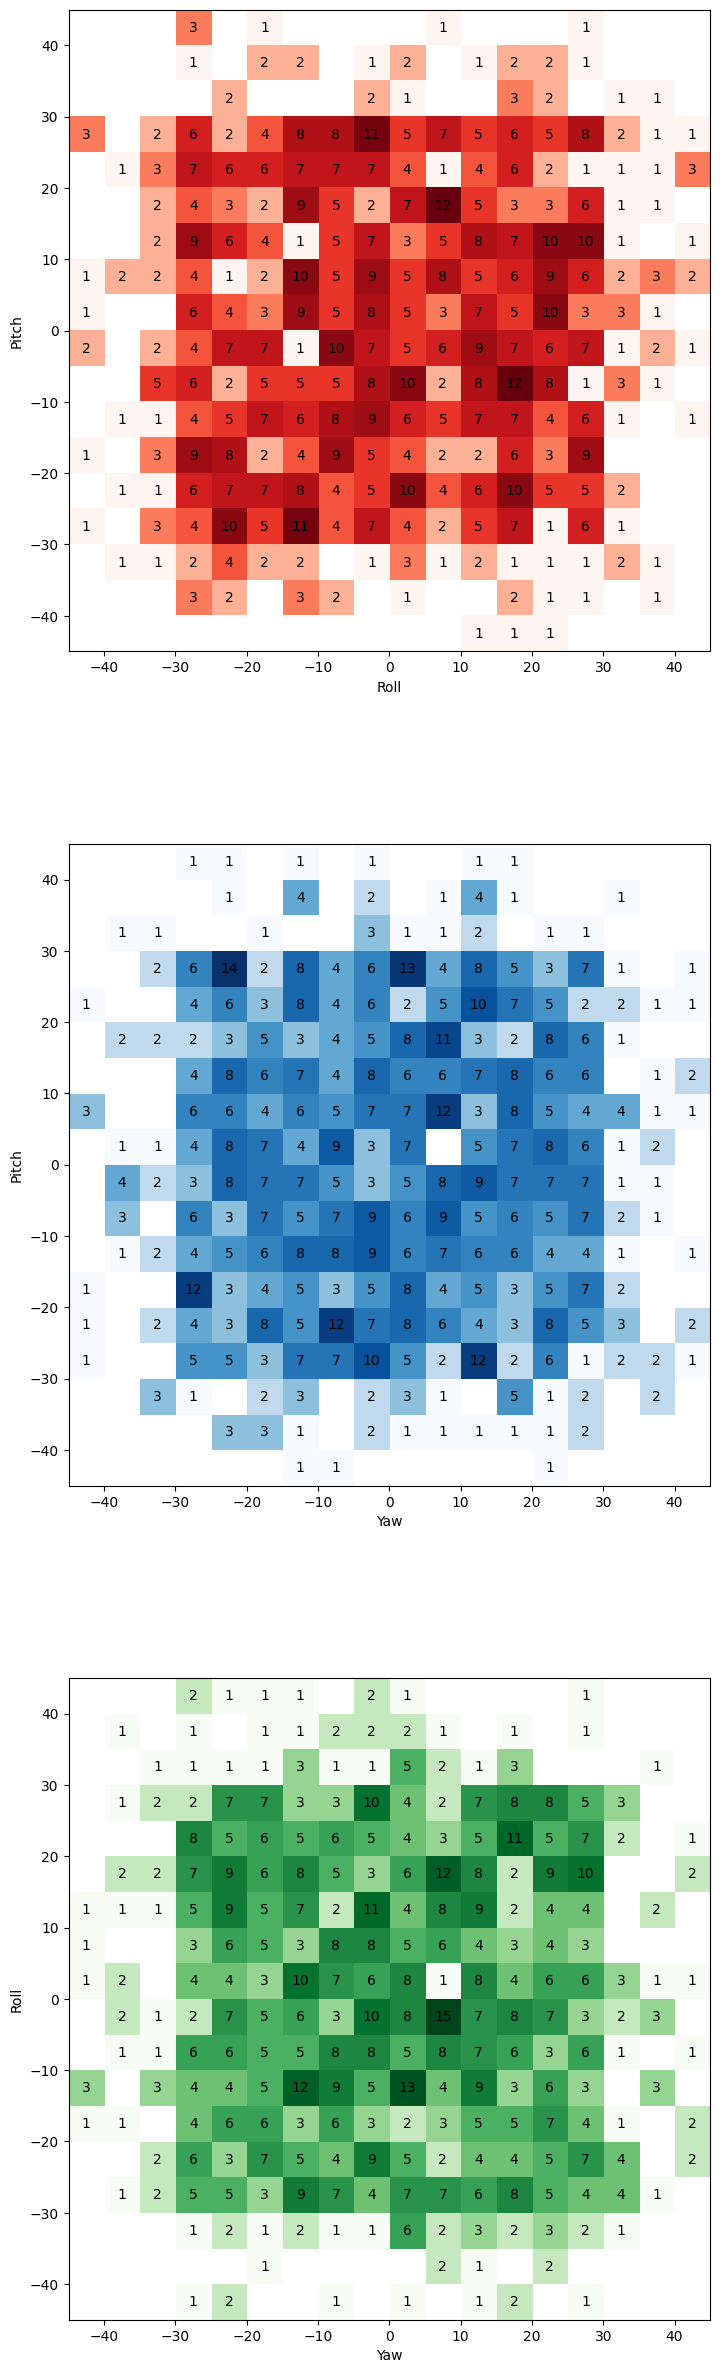

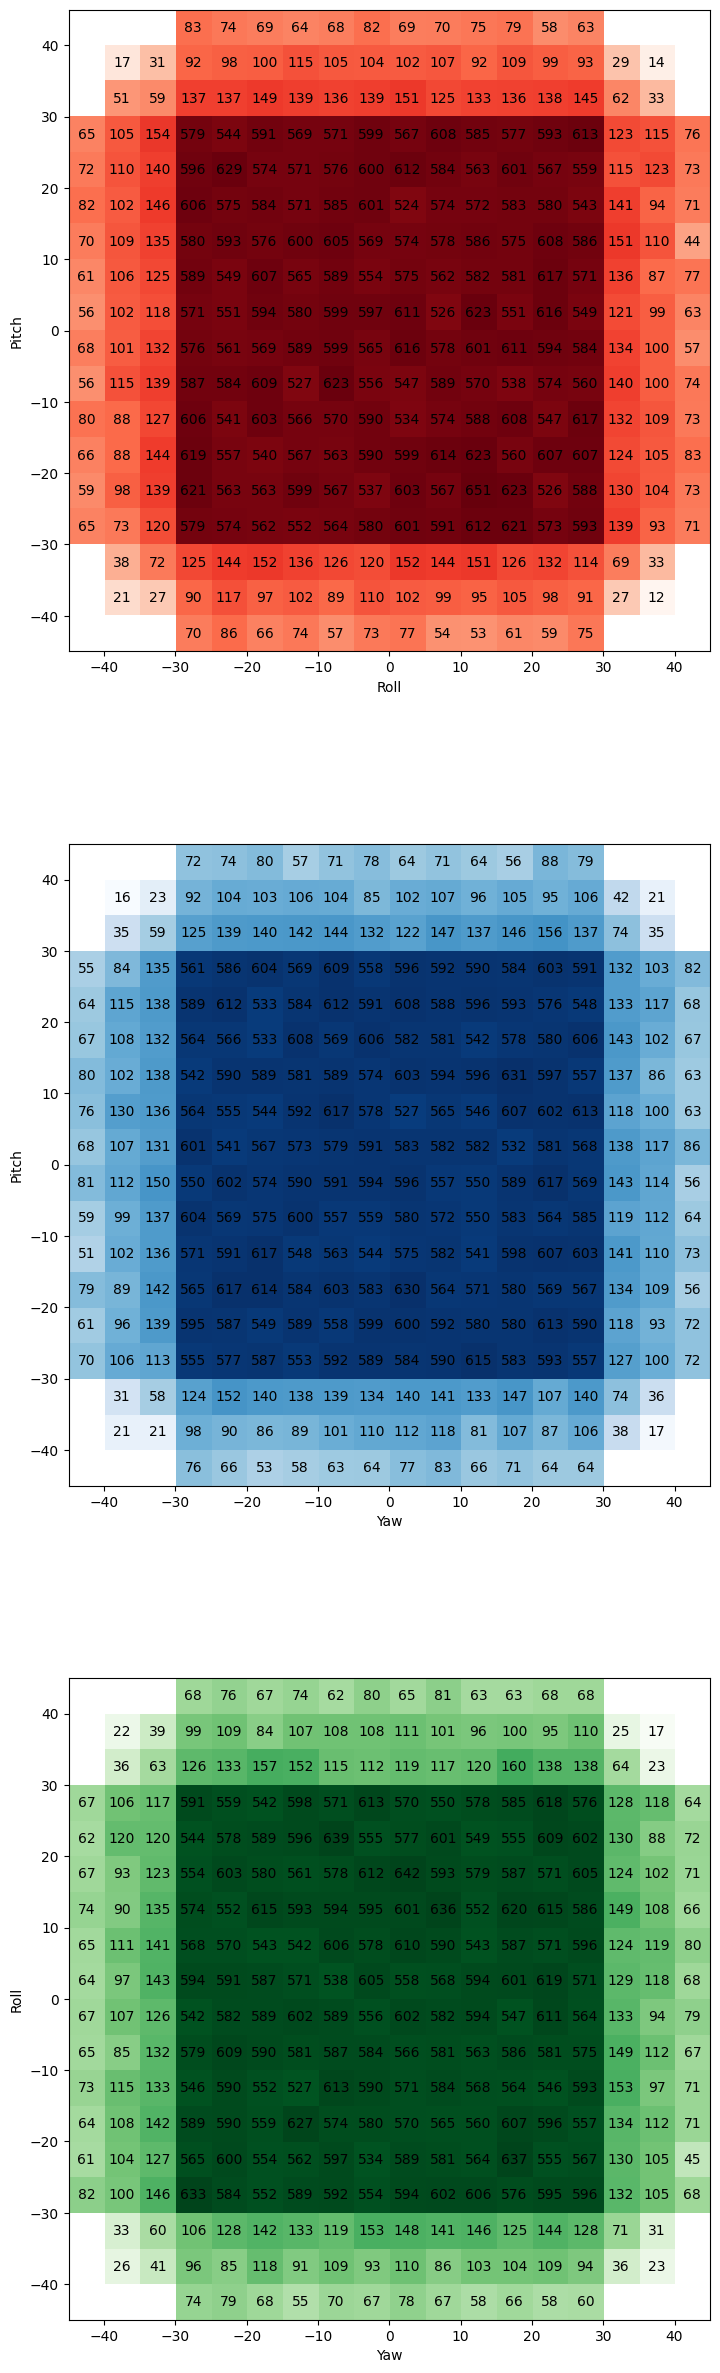

In [141]:
draw_head(990,'head_per_id.png')
draw_head(99000,'head_total.png')

In [142]:
def draw_gaze(num_samples, save_name):
    # 전체 데이터의 15%는 yaw -30에서 30사이, pitch -20에서 20사이
    num_samples_range1 = int(num_samples * 0.15)
    range1_yaw_pitch = np.column_stack([
        np.random.uniform(-30, 30, (num_samples_range1,)),
        np.random.uniform(-15, 15, (num_samples_range1,))
    ])

    # 전체 데이터의 15%는 yaw -15에서 15사이, pitch -30에서 30사이
    num_samples_range2 = int(num_samples * 0.15)
    range2_yaw_pitch = np.column_stack([
        np.random.uniform(-15, 15, (num_samples_range2,)),
        np.random.uniform(-30, 30, (num_samples_range2,))
    ])

    # 전체 데이터의 50%는 yaw -15에서 15사이, pitch -15에서 15사이
    num_samples_range3 = int(num_samples * 0.5)
    range3_yaw_pitch = np.column_stack([
        np.random.uniform(-15, 15, (num_samples_range3,)),
        np.random.uniform(-15, 15, (num_samples_range3,))
    ])
    
    # 전체 데이터의 20%는 yaw -25에서 25사이, pitch -25에서 25사이
    num_samples_range4 = int(num_samples * 0.2)
    range3_yaw_pitch = np.column_stack([
        np.random.uniform(-22.5, 22.5, (num_samples_range4,)),
        np.random.uniform(-22.5, 22.5, (num_samples_range4,))
    ])

    # 각 범위의 데이터를 합침
    yaw_pitch_data = np.vstack([range1_yaw_pitch, range2_yaw_pitch, range3_yaw_pitch])
    
    hist, x_edges, y_edges = np.histogram2d(yaw_pitch_data[:, 0], yaw_pitch_data[:, 1], bins=24, range=[[-30, 30], [-30, 30]])
    fig, axs = plt.subplots(1, 1, figsize=(10, 8))

    add_counts_to_heatmap(axs, x_edges, y_edges, hist)

    # 히스토그램을 이미지로 플롯
    plt.imshow(hist.T, extent=[-30, 30, -30, 30], cmap='Reds', origin='lower')
    plt.colorbar(label='count in bin')
    plt.xlabel('Yaw')
    plt.ylabel('Pitch')
    plt.title('2D Heatmap of Yaw and Pitch')
    plt.savefig(save_name)
    plt.show()

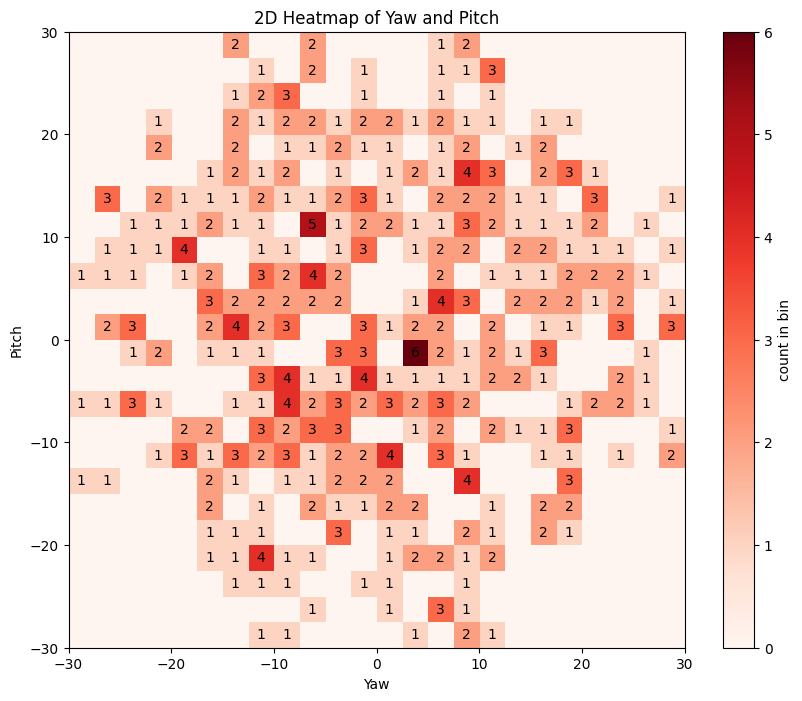

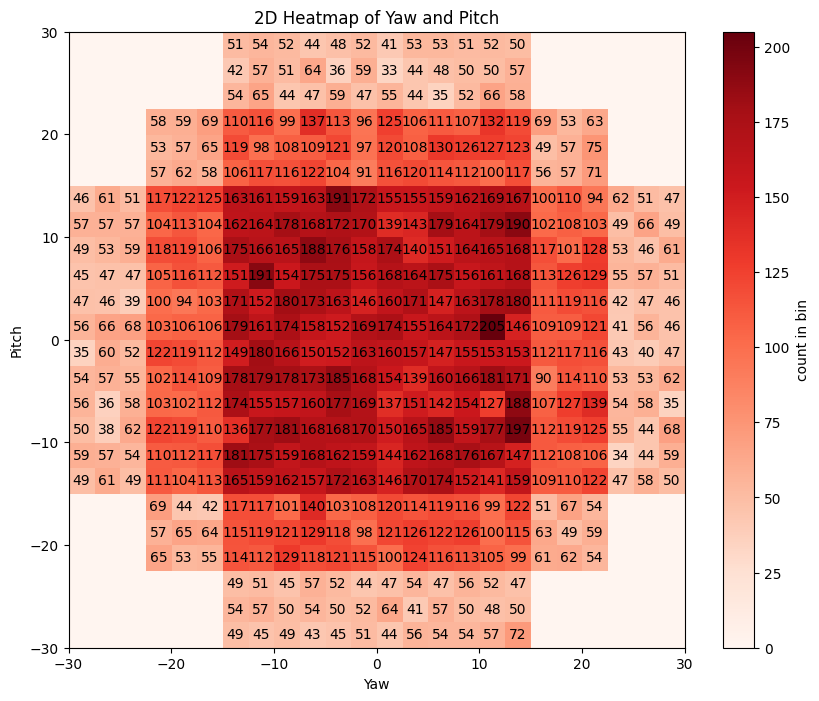

In [143]:
draw_gaze(990,'Gaze_per_id.png')
draw_gaze(99000,'Gaze_total.png')